# Загрузка и проверка датасета

Устанавливаем нужные зависимости

In [ ]:
!pip install -r Hotels-50K/requirements.txt

In [133]:
!zip -r Hotels-50K/images.zip Hotels-50K

from google.colab import files
files.download("Hotels-50K/images.zip")

  adding: Hotels-50K/ (stored 0%)
  adding: Hotels-50K/images/ (stored 0%)
  adding: Hotels-50K/images/train/ (stored 0%)
  adding: Hotels-50K/images/train/73/ (stored 0%)
  adding: Hotels-50K/images/train/73/32137/ (stored 0%)
  adding: Hotels-50K/images/train/73/32137/travel_website/ (stored 0%)
  adding: Hotels-50K/images/train/73/32137/travel_website/6260005.jpg (deflated 2%)
  adding: Hotels-50K/images/train/73/32137/travel_website/6260031.jpg (deflated 2%)
  adding: Hotels-50K/images/train/73/32137/travel_website/6260032.jpg (deflated 1%)
  adding: Hotels-50K/images/train/73/32137/travel_website/6260001.jpg (deflated 3%)
  adding: Hotels-50K/images/train/73/32137/travel_website/6260004.jpg (deflated 2%)
  adding: Hotels-50K/images/train/73/32137/travel_website/6260006.jpg (deflated 3%)
  adding: Hotels-50K/images/train/73/32137/travel_website/6260002.jpg (deflated 2%)
  adding: Hotels-50K/images/train/73/32137/travel_website/6259999.jpg (deflated 3%)
  adding: Hotels-50K/images/t

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Загружаем файлы *train_set.csv, hotel_info, chain_info* и мерджим их по id, чтобы получить таблицу с именами отелей, названиями гостиничных сетей и ссылками на фотографии.



In [ ]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("Hotels-50K/input/dataset/train_set.csv", names=['image_id', 'hotel_id', 'image_url', 'image_source', 'upload_timestamp'])
train_df.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23


In [ ]:
hotel_df = pd.read_csv("Hotels-50K/input/dataset/hotel_info.csv")
hotel_df.head()

,hotel_id,hotel_name,chain_id,latitude,longitude
0,391,Extended Stay America - Fairbanks - Old Airpor...,72,64.83538,-147.82330
1,392,Hilton Hangzhou Qiandao Lake Resort,3,29.60819,119.07290
2,393,Taj Lands End,-1,19.04391,72.81879
3,395,Cambridge Suites Hotel Sydney,-1,46.13663,-60.19551
4,396,Tamanu Beach,14,-18.84213,-159.78794


In [ ]:
chain_df = pd.read_csv("Hotels-50K/input/dataset/chain_info.csv")
chain_df.head()

,chain_id,chain_name
0,-1,unknown
1,0,Best Western
2,1,Hyatt
3,2,Marriott
4,3,Hilton


In [ ]:
df = train_df.merge(hotel_df, on="hotel_id").merge(chain_df, on="chain_id")
df["image_id"] = df["image_id"].astype(str)
df["hotel_id"] = df["hotel_id"].astype(str)
df["chain_id"] = df["chain_id"].astype(str)

df.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,hotel_name,chain_id,latitude,longitude,chain_name
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,Hilton Minneapolis,3,44.97338,-93.27331,Hilton
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,Hilton Minneapolis,3,44.97338,-93.27331,Hilton
2,2599229,18187,https://traffickcam.com/images/2017/7/20160627...,traffickcam,6/27/16 21:27,Hilton Minneapolis,3,44.97338,-93.27331,Hilton
3,2599231,18187,https://traffickcam.com/images/2017/7/20160627...,traffickcam,6/27/16 21:27,Hilton Minneapolis,3,44.97338,-93.27331,Hilton
4,2599232,18187,https://traffickcam.com/images/2017/7/20160627...,traffickcam,6/27/16 21:27,Hilton Minneapolis,3,44.97338,-93.27331,Hilton


Выведем некоторую информацию о нашей таблице, проверим нет ли в ней пропусков.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124215 entries, 0 to 1124214
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   image_id          1124215 non-null  object 
 1   hotel_id          1124215 non-null  object 
 2   image_url         1124215 non-null  object 
 3   image_source      1124215 non-null  object 
 4   upload_timestamp  1124215 non-null  object 
 5   hotel_name        1124215 non-null  object 
 6   chain_id          1124215 non-null  object 
 7   latitude          1124215 non-null  float64
 8   longitude         1124215 non-null  float64
 9   chain_name        1124215 non-null  object 
dtypes: float64(2), object(8)
memory usage: 94.3+ MB


Выведем кол-во уникальных классов

In [ ]:
print("Image count:", len(df))
print("Hotel count:", len(df["hotel_id"].unique()))
print("Chain count:", len(df["chain_id"].unique()))

Image count: 1124215
Hotel count: 50000
Chain count: 93


Выведем распределение кол-ва фотографий по классам

In [ ]:
df['hotel_name'].value_counts(dropna=False)

Quality Inn                 3228
Quality Inn & Suites        2348
Comfort Inn                 2157
Econo Lodge                 1846
Comfort Inn & Suites        1673
                            ... 
Edgewater Inn Shady Cove       4
Super 8 Franklin Pa            4
Hotel Wagner                   4
Hotel Baseraa                  4
Sleep Inn Lexington            4
Name: hotel_name, Length: 48228, dtype: int64

In [ ]:
df['chain_name'].value_counts(dropna=False)

unknown            657626
Holiday Inn         52995
Hampton             28541
Best Western        22517
Comfort Inn         18773
                    ...  
Gaylord               152
Curio                 124
Hawthorn Suites        41
Wingate                30
Four Points            15
Name: chain_name, Length: 93, dtype: int64

# Подготовка меньшего датасета для загрузки фотографий

Для демонстрации работы алгоритма я  предлагаю выбрать 50 случайных отелей, а количество фотографий ограничить одним десятком, чтобы не затрачивать дополнительные вычислительные ресурсы. Предположим, что такого количества фотографий хватит для описания индивидуального отеля.

In [55]:
hotel_group_df = df.groupby(by=["hotel_id"])["hotel_id"].count().to_frame("image_count")

In [56]:
sample_hotels = hotel_group_df[(hotel_group_df["image_count"] > 10)]
print("Number of hotels with more than 100 images:", len(sample_hotels))
sample_hotels = sample_hotels.sample(50, random_state=42)

Number of hotels with more than 100 images: 42856


In [60]:
sample_hotels.index

Index(['21379', '31078', '36121', '32726', '10174', '36415', '449087',
       '382433', '89031', '44340', '138749', '32137', '216362', '40838',
       '357586', '20322', '41554', '38241', '5490', '60539', '13202', '50872',
       '31971', '22911', '25915', '31126', '35982', '66673', '44344', '16880',
       '75985', '450823', '208254', '26343', '31034', '38552', '22685',
       '474953', '33918', '3696', '23517', '255590', '142687', '52086',
       '46024', '17945', '26764', '10511', '41438', '46192'],
      dtype='object', name='hotel_id')

In [61]:
sampled_photos = df.iloc[:0].copy()



for hotel_id in sample_hotels.index:
    hotel_photos = df[df['hotel_id'] == hotel_id]
    sampled = hotel_photos.sample(10, random_state=42)
    sampled_photos = pd.concat([sampled_photos, sampled])

In [62]:
print("Sampled images:", len(sampled_photos ))

Sampled images: 500


In [63]:
sampled_photos

,image_id,hotel_id,image_url,image_source,upload_timestamp,hotel_name,chain_id,latitude,longitude,chain_name
282679,8159836,21379,https://i.travelapi.com/hotels/7000000/6140000...,travel_website,2019-12-21 16:35:37,Novum Style Hotel Berlin-Centrum,-1,52.52079,13.32766,unknown
282677,8159834,21379,https://i.travelapi.com/hotels/7000000/6140000...,travel_website,2019-12-21 16:35:37,Novum Style Hotel Berlin-Centrum,-1,52.52079,13.32766,unknown
282668,8159825,21379,https://i.travelapi.com/hotels/7000000/6140000...,travel_website,2019-12-21 16:35:37,Novum Style Hotel Berlin-Centrum,-1,52.52079,13.32766,unknown
282676,8159833,21379,https://i.travelapi.com/hotels/7000000/6140000...,travel_website,2019-12-21 16:35:37,Novum Style Hotel Berlin-Centrum,-1,52.52079,13.32766,unknown
282673,8159830,21379,https://i.travelapi.com/hotels/7000000/6140000...,travel_website,2019-12-21 16:35:37,Novum Style Hotel Berlin-Centrum,-1,52.52079,13.32766,unknown
...,...,...,...,...,...,...,...,...,...,...
1084007,6231073,46192,https://i.travelapi.com/hotels/1000000/30000/2...,travel_website,2019-12-19 00:10:31,ibis Styles Hamburg Alster City,45,53.57494,10.04266,ibis
1084004,6231070,46192,https://i.travelapi.com/hotels/1000000/30000/2...,travel_website,2019-12-19 00:10:31,ibis Styles Hamburg Alster City,45,53.57494,10.04266,ibis
1084005,6231071,46192,https://i.travelapi.com/hotels/1000000/30000/2...,travel_website,2019-12-19 00:10:31,ibis Styles Hamburg Alster City,45,53.57494,10.04266,ibis
1083998,6231064,46192,https://i.travelapi.com/hotels/1000000/30000/2...,travel_website,2019-12-19 00:10:31,ibis Styles Hamburg Alster City,45,53.57494,10.04266,ibis


In [64]:
sampled_photos['hotel_name'].value_counts(dropna=False)

Novum Style Hotel Berlin-Centrum                    10
Gardenia Hotel                                      10
Residence Inn Marriott Ocala                        10
Hotel de France Gare de Lyon Bastille               10
Quality Inn                                         10
Timothy Beach Resort                                10
OYO Flagship 11435 Aria Grand Esplanade             10
Hotel Indigo Denver Downtown                        10
Mantra Amphora                                      10
Sheraton Cerritos Hotel at Towne Center             10
Econo Lodge Mechanicsburg                           10
Quentin Hotel                                       10
HAtel & Suites Normandin                            10
Talaso Hotel Louxo La Toja                          10
Hampton Inn Havelock                                10
Hotel Dell'Opera                                    10
Hotel Intourist                                     10
The Bugle Inn                                       10
AmericInn 

Скачиваем фотографии на основе кода с [kaggle.com](https://www.kaggle.com/code/michaln/hotels-50k-eda-and-image-download/notebook)

In [66]:
from __future__ import print_function
import csv, multiprocessing, cv2, os
import urllib
import urllib.request

import ssl

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [67]:
output_folder = "Hotels-50K/images"
output_image_folder  = output_folder + "/train"


In [68]:
def url_to_image(url):
    resp = urllib.request.urlopen(url, context=ctx)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
    return image


def download_images(imList):
    # 2d list, rows are samples
    # columns: "chain_id", "hotel_id", "image_source", "image_id", "image_url"
    for im in imList:
        try:
            saveDir = os.path.join(output_image_folder, im[0], im[1], im[2])
            if not os.path.exists(saveDir):
                os.makedirs(saveDir)

            savePath = os.path.join(saveDir, str(im[3])+'.'+im[4].split('.')[-1])

            if not os.path.isfile(savePath):
                img = url_to_image(im[4])
                cv2.imwrite(savePath,img)
            else:
                print('Already exists: ' + savePath)
        except Exception as e:
            print(e, ': ' + im[4])

In [69]:
image_data_array = sampled_photos[["chain_id", "hotel_id", "image_source", "image_id", "image_url"]].values

pool = multiprocessing.Pool()
NUM_THREADS = multiprocessing.cpu_count()
for cpu in range(NUM_THREADS):
    pool.apply_async(download_images,[image_data_array[cpu::NUM_THREADS]])

pool.close()
pool.join()

HTTP Error 404: Not Found : https://i.travelapi.com/hotels/7000000/6140000/6133000/6132968/1b6c76ab_b.jpg
HTTP Error 404: Not Found : https://i.travelapi.com/hotels/7000000/6140000/6133000/6132968/044ba87c_b.jpg
HTTP Error 404: Not Found : https://i.travelapi.com/hotels/7000000/6140000/6133000/6132968/74010a97_b.jpg
HTTP Error 404: Not Found : https://i.travelapi.com/hotels/7000000/6140000/6133000/6132968/d453cdab_b.jpg
HTTP Error 404: Not Found : https://i.travelapi.com/hotels/7000000/6140000/6133000/6132968/32e6aff0_b.jpg
HTTP Error 404: Not Found : https://i.travelapi.com/hotels/7000000/6140000/6133000/6132968/3614ab86_b.jpg
HTTP Error 404: Not Found : https://i.travelapi.com/hotels/7000000/6140000/6133000/6132968/b4a6c8bd_b.jpg
HTTP Error 404: Not Found : https://i.travelapi.com/hotels/7000000/6140000/6133000/6132968/a34bc7f0_b.jpg
HTTP Error 404: Not Found : https://i.travelapi.com/hotels/2000000/1060000/1052400/1052381/2c96e869_b.jpg
HTTP Error 404: Not Found : https://i.travelap

In [70]:
!find {output_image_folder} -type f | wc -l

372


In [71]:
sampled_photos["downloaded"] = False
sampled_photos["image_tag"] = None
sampled_photos["image_path"] = None

for index, row in sampled_photos.iterrows():
    image_folder = os.path.join(output_image_folder, row["chain_id"], row["hotel_id"], row["image_source"])
    image_name   = row["image_id"] + '.'+ row["image_url"].split('.')[-1]
    image_path   = os.path.join(image_folder, image_name)
    if os.path.exists(image_path):
        sampled_photos.loc[index, "downloaded"] = True
        sampled_photos.loc[index, "image_path"] = image_path

In [72]:
sampled_photos[sampled_photos['downloaded'] & sampled_photos['image_tag']][['image_tag', 'image_path']]

,image_tag,image_path


In [73]:
sampled_photos.to_csv("Hotels-50K/sample.csv", index=False)

# Создание тэгов.
(с готовыми изображениями начинать отсюда!)

In [74]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.4 MB/s eta 0:00:00


In [75]:
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")



In [76]:
tags = np.array(['kitchen', 'tv', 'plants']) #, "white", "blue", "red", "yellow"])
#tags = np.array(['tv'])

In [ ]:
sampled_photos = pd.read_csv("Hotels-50K/sample.csv")
from PIL import Image
for index, row in sampled_photos.iterrows():
    if row['downloaded']:
      im_path = row['image_path']
      image = Image.open(im_path)

      # inputs = processor(text=["a room with plants","a room with a tv", "a kitchen", "a white room", "a blue room", "a red room", "a yellow room"], images=image, return_tensors="pt", padding=True)
      # inputs = processor(text=["a room without a TV, but with a painting that looks like one", "a room with a TV screen and not a painting"], images=image, return_tensors="pt", padding=True)
      inputs = processor(text=[
                               "a room with no kitchen", "a room with a kitchen",
                               "a room with no TV, but with a painting that looks like one", "a room with a TV screen and not a painting",
                               "a room without plants", "a room with plants"],

                         images=image,
                         return_tensors="pt",
                         padding=True)
      outputs = model(**inputs)

      logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
      logits_ = logits_per_image.detach().numpy()[0]

      selection = []

      for i in range(0, len(logits_), 2):
        if logits_[i] < logits_[i+1] and logits_[i+1] > 26.5:
          selection.append(True)
        else:
          selection.append(False)

      selected_tags = tags[selection]
      if selected_tags.size > 0:
        sampled_photos.loc[index, "image_tag"] = ', '.join(selected_tags)
        #sampled_photos.loc[index, "image_tag"] = str(selected_tags) + str(logits_[-1])

In [165]:
sampled_photos_cut = sampled_photos[sampled_photos['downloaded'] & sampled_photos['image_tag']][['hotel_name', 'image_tag', 'image_path']]

In [ ]:
sampled_photos_cut

In [163]:
from PIL import Image
from matplotlib import pyplot as plt

# im = Image.open('Hotels-50K/images/train/-1/33918/travel_website/6263030.jpg')
# plt.imshow(im)

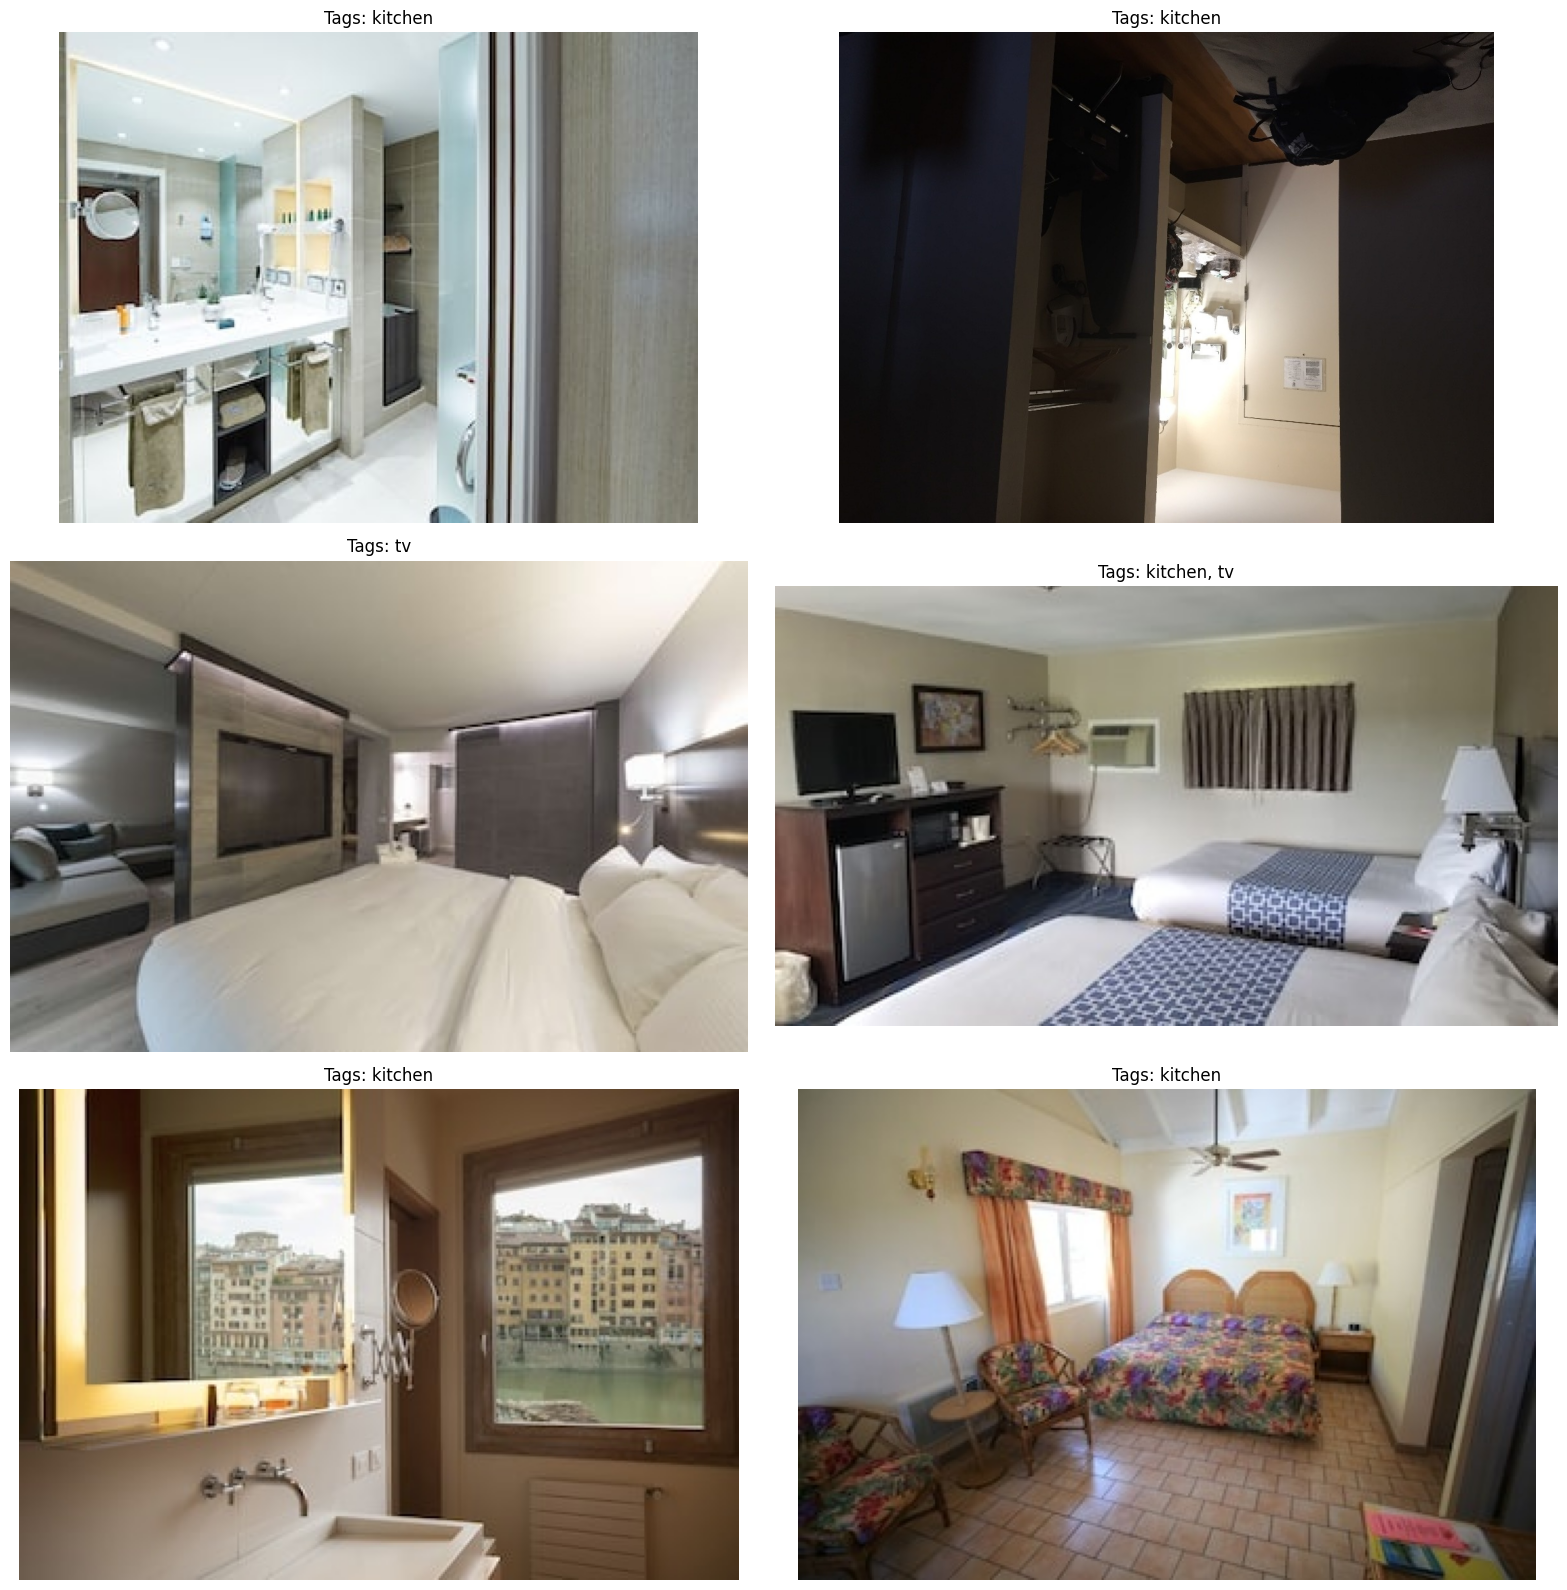

In [167]:
selected_tags, selected_paths = sampled_photos_cut.sample(6)[['image_tag', 'image_path']].values.T
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
for i in range(3):
    for j in range(2):
        # tag, path = sampled_photos_cut.sample()[['image_tag', 'image_path']].values[0]
        tag, path = selected_tags[0], selected_paths[0]
        selected_tags, selected_paths = np.delete(selected_tags, 0), np.delete(selected_paths, 0)
        im = Image.open(path)
        axes[i, j].imshow(im)
        axes[i, j].set_title(f'Tags: {tag}')
        axes[i, j].axis('off')
fig.tight_layout()
plt.show()

In [157]:
df1 = sampled_photos_cut.groupby(by=["hotel_name", "image_tag"])["hotel_name"].count().to_frame("tag_count")

In [158]:
df1

tag_count
hotel_name                          image_tag                     
APA Hotel Asakusa-Kuramae           plants                       2
                                    tv, plants                   8
AmericInn Hotel & Suites Stillwater tv, plants                   2
Belgravia Suites Wuxi               kitchen, tv, plants          1
                                    plants                       1
...                                                            ...
ZEN Premium Ubud Hanoman II         kitchen, tv, plants          1
                                    plants                       1
                                    tv, plants                   2
ibis Styles Hamburg Alster City     plants                       2
                                    tv, plants                   5

[114 rows x 1 columns]

In [168]:
df1 = sampled_photos_cut.groupby(by=["image_tag"])["hotel_name"].count().to_frame("tag_count")

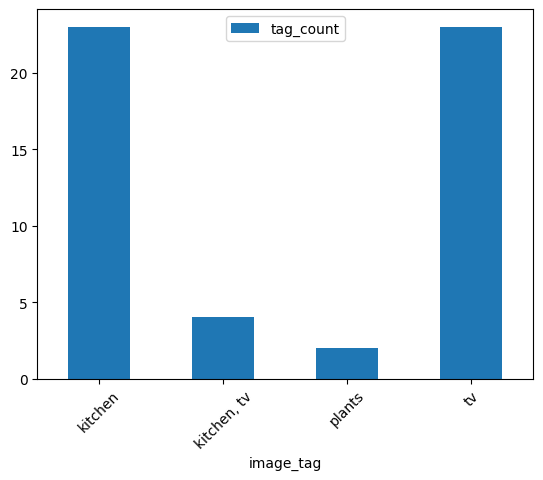

In [169]:
ax = df1.plot.bar(rot=45)